<class 'numpy.ndarray'>


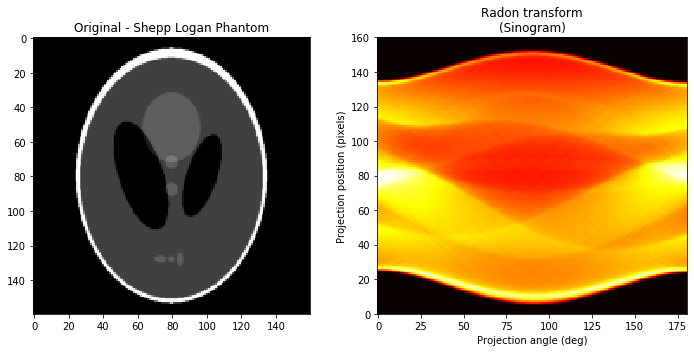

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')
print(type(image))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("Original - Shepp Logan Phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap= 'hot',
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()
    

In [52]:
import math
from PIL import Image, ImageDraw
  
w, h = 200, 200
shape = [(40, 40), (w-40, h - 40)]
  
# creating new Image object
img = Image.new("RGB", (w, h))
  
# create rectangle image
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, fill ="white" )
#img.show()
print(img1.shape)

#sinogram = radon(img1, theta=[0])


<bound method ImageDraw.shape of <PIL.ImageDraw.ImageDraw object at 0x000002188CF57C48>>


C:\Users\91998\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
C:\Users\91998\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
C:\Users\91998\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, ex

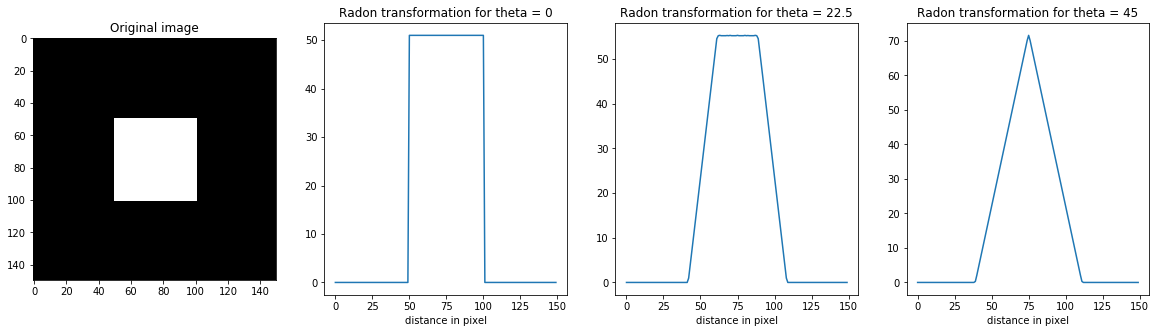

In [87]:
import numpy as np
from skimage.draw import rectangle, set_color
n = 150
d = 50
img = np.zeros((n, n), dtype=np.uint8)
start = (d, d)
end = (n-d, n-d)
rr, cc = rectangle(start, end = end, shape=img.shape)

set_color(img, (rr, cc), 1)
         
fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4, figsize=(20, 5))

ax1.imshow(img, cmap=plt.cm.Greys_r)
ax1.set_title('Original image')

ax2.plot(radon(img, theta=[0]))
ax2.set_title('Radon transformation for theta = 0')
ax2.set_xlabel('distance in pixel')

ax3.plot(radon(img, theta=[22.5]))
ax3.set_title('Radon transformation for theta = 22.5')
ax3.set_xlabel('distance in pixel')

ax4.plot(radon(img, theta=[45]))
ax4.set_title('Radon transformation for theta = 45')
ax4.set_xlabel('distance in pixel')

plt.show()



C:\Users\91998\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.


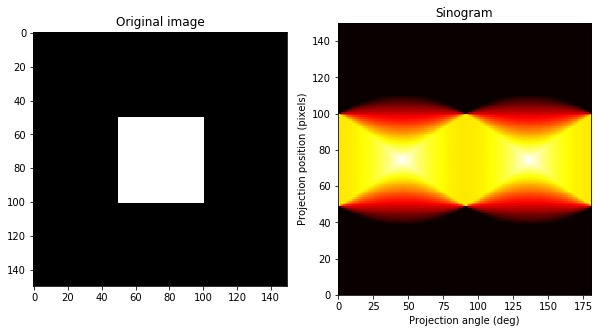

In [86]:
import numpy as np
from skimage.draw import rectangle, set_color
n = 150
d = 50
img = np.zeros((n, n), dtype=np.uint8)
start = (d, d)
end = (n-d, n-d)
rr, cc = rectangle(start, end = end, shape=img.shape)

set_color(img, (rr, cc), 1)
         
fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap=plt.cm.Greys_r)
ax1.set_title('Original image')

theta = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram = radon(img, theta=theta)
dx, dy = 0.5 * 180.0 / max(img.shape), 0.5 / sinogram.shape[0]

ax2.set_title("Sinogram")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap= 'hot',
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
plt.show()